In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nisafebrianti","key":"8882c2eaeba94483ab4b87283a62f979"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d emmanuelfwerr/thyroid-disease-data

Dataset URL: https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data
License(s): CC0-1.0
  0% 0.00/145k [00:00<?, ?B/s]
100% 145k/145k [00:00<00:00, 124MB/s]


In [5]:
!unzip thyroid-disease-data.zip -d thyroid-disease-data
!ls thyroid-disease-data

Archive:  thyroid-disease-data.zip
  inflating: thyroid-disease-data/thyroidDF.csv  
thyroidDF.csv


In [12]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [13]:
df = pd.read_csv('/content/thyroid.csv')

In [14]:
df.head()

Unnamed: 0  age  sex  on_thyroxine  query_on_thyroxine  \
0          19   36    0             0                   0   
1          21   40    0             0                   0   
2          22   40    0             0                   0   
3          23   77    0             0                   0   
4          27   51    0             0                   0   

   on_antithyroid_meds  sick  pregnant  thyroid_surgery  I131_treatment  ...  \
0                    0     0         0                0               0  ...   
1                    0     0         0                0               0  ...   
2                    0     0         0                0               0  ...   
3                    0     0         0                0               0  ...   
4                    0     0         0                0               0  ...   

   TT4_measured    TT4  T4U_measured   T4U  FTI_measured    FTI  TBG_measured  \
0             1   90.0             1  1.06             1   85.0             0   
1             1  104.0             1  1.08             1   96.0             0   
2             1   88.0             1  0.84             1  105.0             0   
3             1  107.0             1  1.13             1   95.0             0   
4             1   93.0             1  0.87             1  106.0             0   

   referral_source  target  patient_id  
0              0.0       0   840815068  
1              0.0       0   840816001  
2              0.0       0   840816002  
3              0.0       0   840816003  
4              1.0       0   840816007  

[5 rows x 31 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4781 non-null   int64  
 1   age                  4781 non-null   int64  
 2   sex                  4781 non-null   int64  
 3   on_thyroxine         4781 non-null   int64  
 4   query_on_thyroxine   4781 non-null   int64  
 5   on_antithyroid_meds  4781 non-null   int64  
 6   sick                 4781 non-null   int64  
 7   pregnant             4781 non-null   int64  
 8   thyroid_surgery      4781 non-null   int64  
 9   I131_treatment       4781 non-null   int64  
 10  query_hypothyroid    4781 non-null   int64  
 11  query_hyperthyroid   4781 non-null   int64  
 12  lithium              4781 non-null   int64  
 13  goitre               4781 non-null   int64  
 14  tumor                4781 non-null   int64  
 15  hypopituitary        4781 non-null   i

In [16]:
# melihat nilai korelasi antar kolom pada target kolom
correlation_matrix = df.corr()
correlations_with_target = correlation_matrix['target'].sort_values(ascending=False)
correlations_with_target.drop('target').to_frame()

target
TSH                  0.267496
T3                   0.220407
FTI                  0.180440
TT4                  0.162595
query_hyperthyroid   0.141628
tumor                0.102691
pregnant             0.044652
query_hypothyroid    0.036518
T4U                  0.031787
on_antithyroid_meds  0.017488
Unnamed: 0           0.008112
patient_id           0.001547
TBG_measured        -0.006021
I131_treatment      -0.006845
age                 -0.007264
query_on_thyroxine  -0.014752
sick                -0.021711
lithium             -0.023980
goitre              -0.034606
thyroid_surgery     -0.037465
referral_source     -0.072530
psych               -0.075576
on_thyroxine        -0.078877
sex                 -0.093682
hypopituitary             NaN
TSH_measured              NaN
T3_measured               NaN
TT4_measured              NaN
T4U_measured              NaN
FTI_measured              NaN

In [17]:
# membuat variabel fitur dan target
features = ['TSH','T3','FTI','TT4','query_hyperthyroid','tumor','TT4_measured']
x = df[features].values
y = df['target'].values
x.shape, y.shape

((4781, 7), (4781,))

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [19]:
print(x.shape, x_train.shape, x_test.shape)

(4781, 7) (3824, 7) (957, 7)


In [20]:
print(y.shape, y_train.shape, y_test.shape)

(4781,) (3824,) (957,)


In [21]:
# modelling
model = Sequential([
  layers.Dense(8, activation='relu', input_dim=x.shape[-1]),
  layers.Dense(16, activation='relu'),
  layers.Dense(3, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 259 (1.01 KB)
Trainable params: 259 (1.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
# training model
epochs=15
history = model.fit(
  x_train,
  y_train,
  batch_size=1,
  shuffle=True,
  verbose=1,
  epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3824/3824 [==============================] - 13s 3ms/step - loss: 0.6783 - accuracy: 0.8985
Epoch 2/15
3824/3824 [==============================] - 11s 3ms/step - loss: 0.2726 - accuracy: 0.9354
Epoch 3/15
3824/3824 [==============================] - 11s 3ms/step - loss: 0.2057 - accuracy: 0.9435
Epoch 4/15
3824/3824 [==============================] - 11s 3ms/step - loss: 0.1701 - accuracy: 0.9521
Epoch 5/15
3824/3824 [==============================] - 11s 3ms/step - loss: 0.1505 - accuracy: 0.9563
Epoch 6/15
3824/3824 [==============================] - 11s 3ms/step - loss: 0.1467 - accuracy: 0.9566
Epoch 7/15
3824/3824 [==============================] - 11s 3ms/step - loss: 0.1358 - accuracy: 0.9587
Epoch 8/15
3824/3824 [==============================] - 11s 3ms/step - loss: 0.1352 - accuracy: 0.9540
Epoch 9/15
3824/3824 [==============================] - 11s 3ms/step - loss: 0.1294 - accuracy: 0.9597
Epoch 10/15
3824/3824 [==============================] - 13s 3ms/step - loss: 0.1240

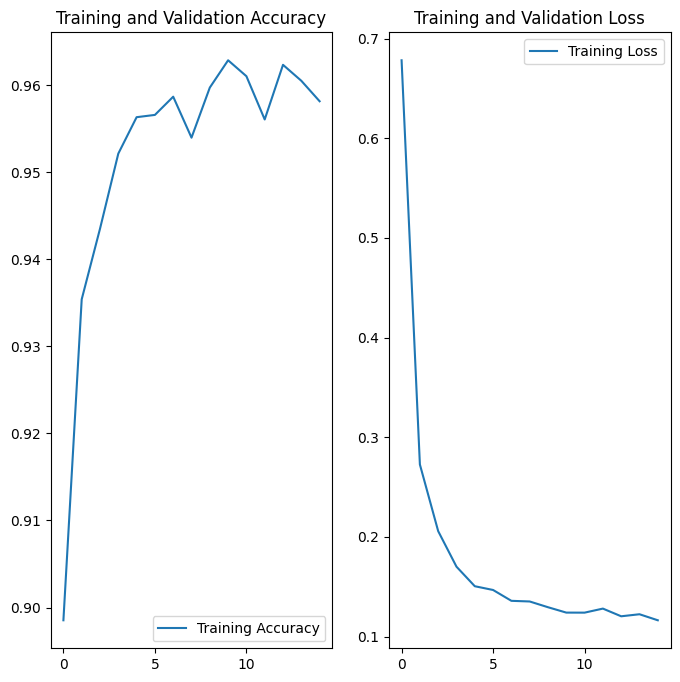

In [25]:
# grafik hasil pelatihan model
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
# akurasi model
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(x_test), axis=1)
print(accuracy_score(y_test, pred))

30/30 [==============================] - 0s 3ms/step
0.9717868338557993


In [27]:
print(x)

[[  1.5   2.4  85.  ...   1.    0.    1. ]
 [  1.2   2.3  96.  ...   0.    0.    1. ]
 [  5.9   2.1 105.  ...   0.    0.    1. ]
 ...
 [ 53.    1.   39.  ...   0.    0.    1. ]
 [  2.3   1.3  81.  ...   0.    0.    1. ]
 [  2.4   1.8 107.  ...   0.    0.    1. ]]


In [28]:
class_name=['Negative', 'Hyperthyroid', 'Hypothyroid']

In [29]:
a = [1.5,2.4,85,1,1,0,1]
a = np.array(a) # convert to a numpy array
a = np.expand_dims(a, 0) # change shape from (8,) to (1,8)

predictions = model.predict(a)
score = tf.nn.softmax(predictions[0])

print(
    "Hasil diagnosa Thyronoid bahwa pasien: {} dengan akurasi {:.2f} %."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)
#model.predict(a) # voila!

1/1 [==============================] - 0s 26ms/step
Hasil diagnosa Thyronoid bahwa pasien: Negative dengan akurasi 57.61 %.


In [30]:
model.save('./thyroid.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
# save model dalam format tf.lite
model = tf.keras.models.load_model('./thyroid.h5')
converter =tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./thyroid.tflite", "wb").write(tflite_model)

3132